# Chapter 4 – Overfitting and Regularization in Neural Networks

This notebook explores the effects of overfitting and underfitting by training different neural network models on the IMDB movie review sentiment classification dataset.

We'll compare:
- A baseline model
- A smaller model (reduced capacity)
- A bigger model (increased capacity)
- A model with L2 regularization
- A model with Dropout

Our goal is to observe how each of these changes affects model performance.


In [1]:
from keras.datasets import imdb
from keras import models, layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# Load data (only top 10,000 most frequent words)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorize sequences (convert reviews to binary bag-of-words)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Baseline Model

We start with a simple model with two hidden layers of 16 units each. This is the same as the model from Chapter 3.


In [2]:
def build_baseline_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = build_baseline_model()
baseline_history = baseline_model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=0
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Smaller Model

This model has less capacity (only 4 units per layer), which may lead to underfitting.


In [4]:
def build_smaller_model():
    model = models.Sequential()
    model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

smaller_model = build_smaller_model()
smaller_history = smaller_model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=0
)

## Bigger Model

This model has significantly more capacity (512 units per layer), which increases the risk of overfitting.


In [8]:
def build_bigger_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

bigger_model = build_bigger_model()
bigger_history = bigger_model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=0
)


## L2 Regularization

This model includes L2 weight regularization to help reduce overfitting.


In [9]:
def build_l2_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001),
                           input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

l2_model = build_l2_model()
l2_history = l2_model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=0
)


## Dropout Regularization

This model uses Dropout, a powerful regularization technique that randomly drops units during training.


In [10]:
def build_dropout_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

dropout_model = build_dropout_model()
dropout_history = dropout_model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=0
)


## Plot Training and Validation Loss

Now we plot training and validation loss for each model to visually compare their performance.


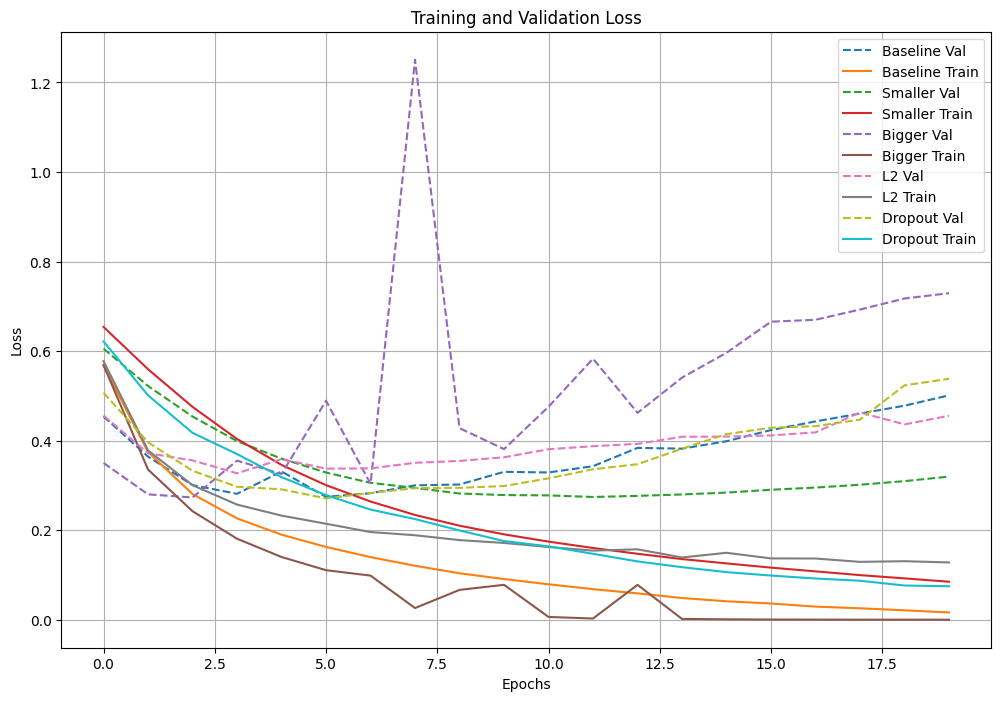

In [11]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(12, 8))

    for name, history in histories:
        val = history.history['val_' + key]
        plt.plot(history.epoch, val, '--', label=name.title() + ' Val')
        plt.plot(history.epoch, history.history[key], label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.capitalize())
    plt.legend()
    plt.grid(True)
    plt.title(f'Training and Validation {key.capitalize()}')
    plt.show()

plot_history([
    ('baseline', baseline_history),
    ('smaller', smaller_history),
    ('bigger', bigger_history),
    ('l2', l2_history),
    ('dropout', dropout_history)
], key='loss')


## Summary & Observations

- The **smaller model** underfits: it has lower capacity and cannot capture enough patterns from data.
- The **bigger model** overfits very quickly: it memorizes training data and performs worse on validation.
- The **L2-regularized model** and the **Dropout model** help reduce overfitting by penalizing complexity.
- The **baseline model** strikes a reasonable balance, but regularization techniques lead to more robust generalization.

This concludes the experiments for Chapter 4.
